# Install MediaPipe

In [1]:
!pip install mediapipe

     |████████████████████████████████| 36.1MB 167kB/s 


# MediaPipe API를 이용한 pose 추출 function

In [1]:
from google.colab import files
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

def extract_pose():
    
    uploaded = files.upload()

    images = {name: cv2.imread(name) for name in uploaded.keys()}

    mp_pose = mp.solutions.pose

    # Prepare DrawingSpec for drawing the face landmarks later.
    mp_drawing = mp.solutions.drawing_utils 
    drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as pose:
        for name, image in images.items():
            # Convert the BGR image to RGB and process it with MediaPipe Pose.
            results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            # Print nose landmark.
            image_hight, image_width, _ = image.shape
            if not results.pose_landmarks:
                continue
            print(
            f'Nose coordinates: ('
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width}, '
            f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_hight})'
            )

            # Draw pose landmarks.
            print(f'Pose landmarks of {name}:')
            annotated_image = image.copy()
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=results.pose_landmarks,
                connections=mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=drawing_spec,
                connection_drawing_spec=drawing_spec)
            
            #시각화
            plt.figure(figsize=(14,12))
            plt.subplot(1, 2, 1)
            plt.imshow(image[...,::-1])
            plt.title('original image')
            plt.axis('off')
            plt.subplot(1, 2, 2)
            plt.imshow(annotated_image[...,::-1])
            plt.title('annotated image')
            plt.axis('off')
            plt.show()

# Main
* 횡단보도에 있는 사람을 인식하고 pose를 추출

Saving woman.jpg to woman.jpg
Saving man.jpg to man.jpg
Saving two.jpg to two.jpg
Saving boy.jpg to boy.jpg
Saving worker.jpg to worker.jpg
Nose coordinates: (148.73095035552979, 180.47510319948196)
Pose landmarks of woman.jpg:


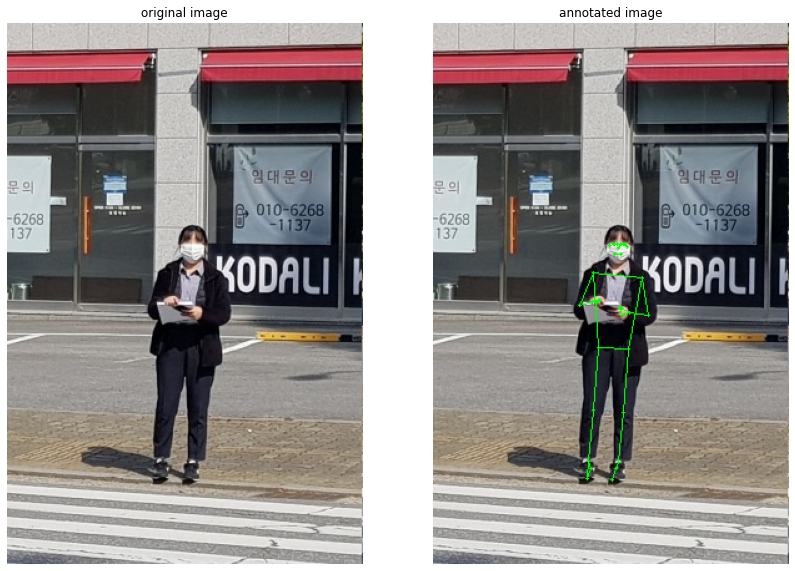

Nose coordinates: (118.26106303930283, 145.8309531211853)
Pose landmarks of man.jpg:


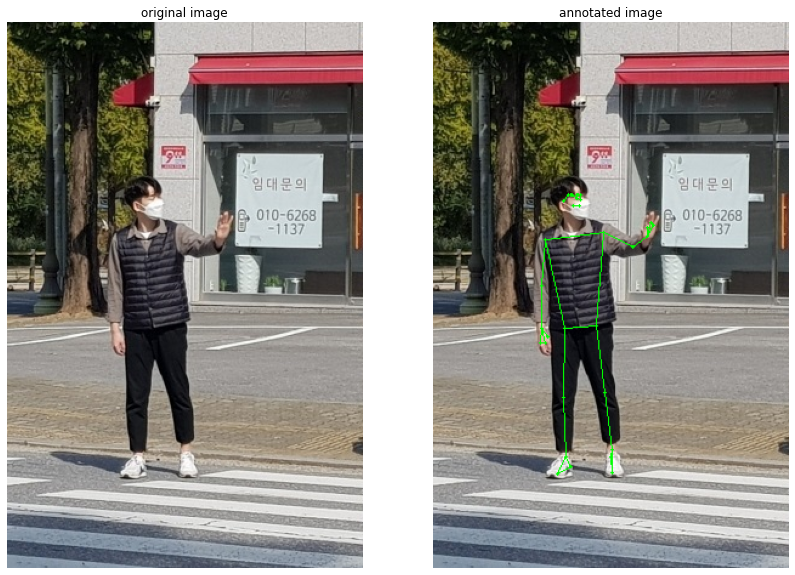

Nose coordinates: (211.45066022872925, 146.13991677761078)
Pose landmarks of two.jpg:


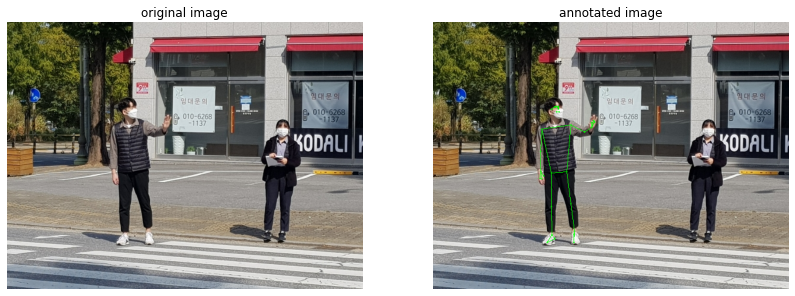

Nose coordinates: (466.61852955818176, 208.84100317955017)
Pose landmarks of boy.jpg:


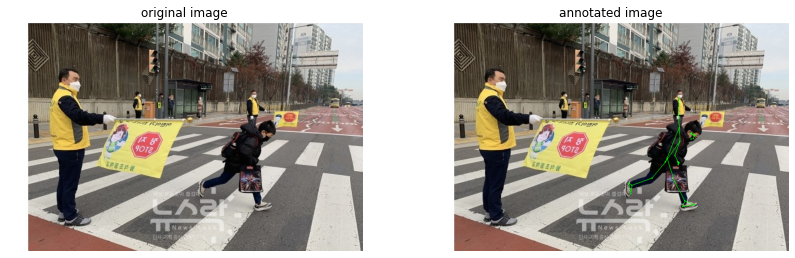

Nose coordinates: (267.7467727661133, 160.02440857887268)
Pose landmarks of worker.jpg:


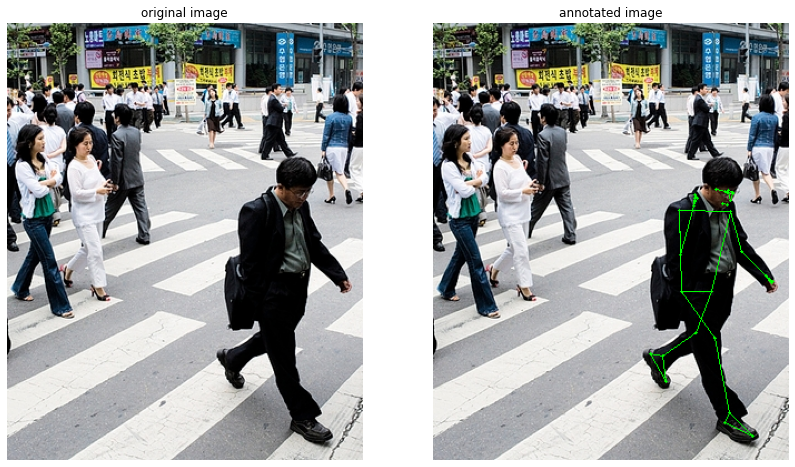

In [4]:
extract_pose()